In [1]:
%load_ext autoreload
%autoreload 2

from popsicle.ml_utils.file_loader import FileLoader
from popsicle.ml_utils.dim_reducer import DimReducer
from popsicle.ml_utils.ml_utils import adjust_r2

from ml_utils import graph
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.neighbors import KNeighborsRegressor

import collections
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import collections

init_notebook_mode(connected=True)

%pylab inline
pylab.rcParams['figure.figsize'] = (15,9)

/home/maciej/t1/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Populating the interactive namespace from numpy and matplotlib


/home/maciej/t1/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy



In [4]:
def evaluate_model(mode, files, n_neighbors_list, dr_alg, dr_params):
    scores = []
    feat_sets = []
    pca_comps = []
    neighs = []
    
    for i in range(50):
        fl = FileLoader(files, mode=mode)
        fl.data.split()
        
        if dr_alg == 'greedy':
            dr_step, dr_n_iter = dr_params
            dr = DimReducer('greedy', n_neighbors_list=n_neighbors_list)
            dr.fit(fl.data.train_set, step=dr_step, n_iter=dr_n_iter)
        elif dr_alg == 'pca':
            pca_comp_list = dr_params
            dr = DimReducer('pca', n_neighbors_list=n_neighbors_list)
            dr.fit(fl.data.train_set, pca_comp_list=pca_comp_list)
        else:
            raise ValueError
        
        x = dr.transform(fl.data.train_set.x)
        x_test = dr.transform(fl.data.test_set.x)
        y, y_test = fl.data.train_set.y, fl.data.test_set.y

        regr = KNeighborsRegressor(n_neighbors=dr.n_neighbors, weights='distance')
        regr.fit(x, y)
        score = regr.score(x_test, y_test)
        adjusted = adjust_r2(score, x_test.shape[0], x_test.shape[1])
        
        print('Score in test set: ' + str(adjusted) + '\n')
        
        scores.append(adjusted)
        feat_sets.append(dr.feats)
        if dr.pca is not None:
            pca_comps.append(dr.pca.n_components)
        neighs.append(dr.n_neighbors)
        
    print('===============')
    print('Score: ' + str(np.mean(scores)) + ' +/- ' + str(np.std(scores)))
    
    if dr_alg == 'step':
        return scores, feat_sets, neighs
    elif dr_alg == 'pca':
        return scores, pca_comps, neighs

In [57]:
def feats_importance(feat_sets):
    counter = collections.Counter()
    for f in feat_sets:
        counter.update(f)
    return counter

In [5]:
files = ['o10']
mode = 'u'
n_neighbors_list = [12, 16, 20, 24]

pca_comp_list = [6, 8, 10, 12, 14, 16, 18, 20]
dr_step = 5
dr_n_iter = 10

#scores, feat_sets, neighs = evaluate_model(mode, files, n_neighbors_list, 'greedy', (dr_step, dr_n_iter))
scores, pcas, neighs = evaluate_model(mode, files, n_neighbors_list, 'pca', (pca_comp_list))
print(scores)
print(feat_sets)
print(neighs)
print(pcas)

Loaded dataframe: (5963, 53)
Loaded dataframe: (5963, 1)
Train set: (3264, 53)
Test set:  (1361, 53)
Performing PCA

	Best score in training set: -0.38
	Best value of n_components: 18
	Best value of n_neighbors: 24

Score in test set: 0.6104927404431605

Loaded dataframe: (5963, 53)
Loaded dataframe: (5963, 1)
Train set: (3301, 53)
Test set:  (1324, 53)
Performing PCA

	Best score in training set: -0.04
	Best value of n_components: 20
	Best value of n_neighbors: 24

Score in test set: 0.5049508974967518

Loaded dataframe: (5963, 53)
Loaded dataframe: (5963, 1)
Train set: (3282, 53)
Test set:  (1343, 53)
Performing PCA

	Best score in training set: 0.02
	Best value of n_components: 20
	Best value of n_neighbors: 24

Score in test set: 0.28319591500733476

Loaded dataframe: (5963, 53)
Loaded dataframe: (5963, 1)
Train set: (3229, 53)
Test set:  (1396, 53)
Performing PCA

	Best score in training set: -0.63
	Best value of n_components: 20
	Best value of n_neighbors: 24

Score in test set: 

Train set: (3230, 53)
Test set:  (1395, 53)
Performing PCA

	Best score in training set: -0.04
	Best value of n_components: 20
	Best value of n_neighbors: 24

Score in test set: 0.6300221818929815

Loaded dataframe: (5963, 53)
Loaded dataframe: (5963, 1)
Train set: (3277, 53)
Test set:  (1348, 53)
Performing PCA

	Best score in training set: -0.07
	Best value of n_components: 18
	Best value of n_neighbors: 24

Score in test set: 0.36909615434470266

Loaded dataframe: (5963, 53)
Loaded dataframe: (5963, 1)
Train set: (3240, 53)
Test set:  (1385, 53)
Performing PCA

	Best score in training set: 0.03
	Best value of n_components: 14
	Best value of n_neighbors: 12

Score in test set: -2.108922660458265

Loaded dataframe: (5963, 53)
Loaded dataframe: (5963, 1)
Train set: (3218, 53)
Test set:  (1407, 53)
Performing PCA

	Best score in training set: -0.37
	Best value of n_components: 8
	Best value of n_neighbors: 12

Score in test set: 0.2706820979785788

Loaded dataframe: (5963, 53)
Loaded da

NameError: name 'feat_sets' is not defined

In [150]:
counter = feats_importance(feat_sets)
feat_ranking = counter.items()
feat_ranking = sorted(feat_ranking, key=lambda i: i[1], reverse=True)
feat_ranking = np.array(feat_ranking)

if feat_ranking[0][0] == 'PAPI_TOT_INS':
    feat_ranking = feat_ranking[1:]

data = [go.Bar(
        x=feat_ranking[::-1, 1][-10:],
        y=feat_ranking[::-1, 0][-10:],
        orientation = 'h')]

iplot(data, filename='horizontal-bar')

"""
for feat, imp in feat_ranking:
    if feat == 'PAPI_TOT_INS':
        print(feat + '\t' + str(imp) + ' %\t === (enabled by default) ===' + '=' * int(imp/2-28))
    else:
        print(feat + '\t' + str(imp) + ' %\t ' + '=' * int(imp/2))
"""

"\nfor feat, imp in feat_ranking:\n    if feat == 'PAPI_TOT_INS':\n        print(feat + '\t' + str(imp) + ' %\t === (enabled by default) ===' + '=' * int(imp/2-28))\n    else:\n        print(feat + '\t' + str(imp) + ' %\t ' + '=' * int(imp/2))\n"

In [151]:
for feat, imp in feat_ranking:
    if feat == 'PAPI_TOT_INS':
        print(feat + '\t' + str(imp) + ' %\t === (enabled by default) ===' + '=' * int(imp/2-28))
    else:
        print(feat + '\t' + str(imp) + ' %\t ' + '=' * int(imp/2))

TypeError: unsupported operand type(s) for /: 'numpy.str_' and 'int'

Loaded dataframe: (6363, 53)
Loaded dataframe: (6359, 1)
Train set: (2047, 52)
Test set:  (891, 52)
Performing step feature selection (step=5, n_iter=4)
	Iteration 1/4 for 12 neighbours
	Iteration 2/4 for 12 neighbours
	Iteration 3/4 for 12 neighbours
	Iteration 4/4 for 12 neighbours

	Best score in training set: 0.69
	Best value of n_neighbors: 12
	Selected 7 features:
		PAPI_TOT_INS
		PAPI_FDV_INS
		PAPI_FML_INS
		PAPI_L1_DCM
		PAPI_L1_STM
		PAPI_L2_TCM
		PAPI_VEC_INS

Weights tuning (using genetic algorithm)
	Generation 0/10
	Generation 1/10
	Generation 2/10
	Generation 3/10
	Generation 4/10
	Generation 5/10
	Generation 6/10
	Generation 7/10
	Generation 8/10
	Generation 9/10


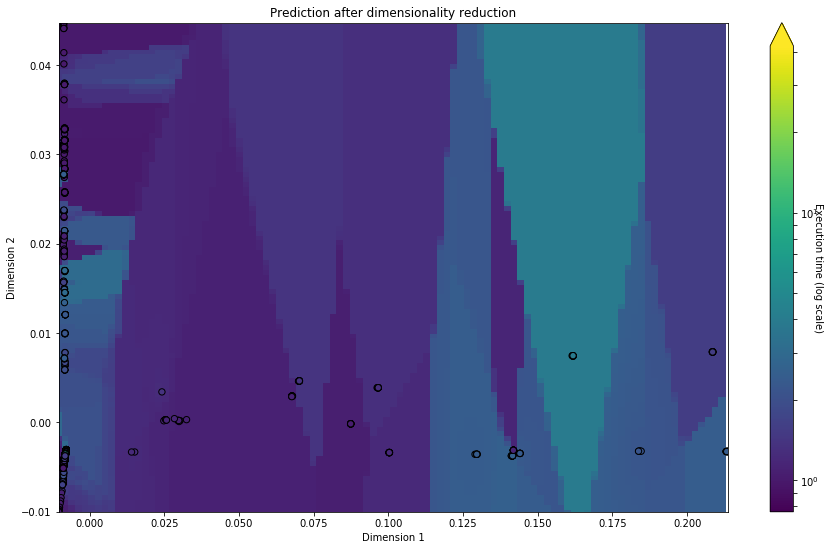

In [23]:
n_neighbors_list = [12]
dr_step = 5
dr_n_iter = 4

fl = FileLoader(['o17l'], mode='t')
fl.data.split()

dr = DimReducer('step', n_neighbors_list=n_neighbors_list)
dr.fit(fl.data.train_set, step=dr_step, n_iter=dr_n_iter)
x = dr.transform(fl.data.train_set.x)
x_test = dr.transform(fl.data.test_set.x)
y, y_test = fl.data.train_set.y, fl.data.test_set.y

regr = KNeighborsRegressor(n_neighbors=dr.n_neighbors, weights='distance')
regr.fit(x, y)

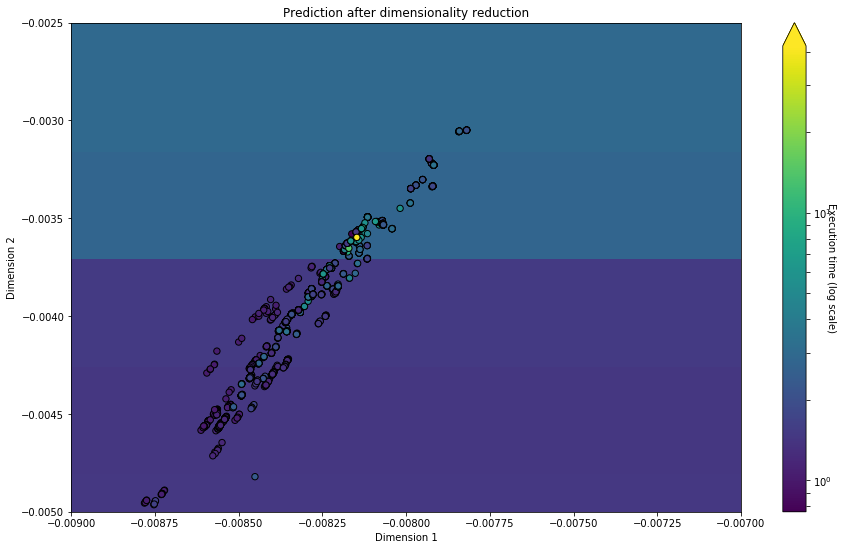

In [29]:
graph(regr, x, y, xlim=[-.009, -.007], ylim=[-.005, -.0025])

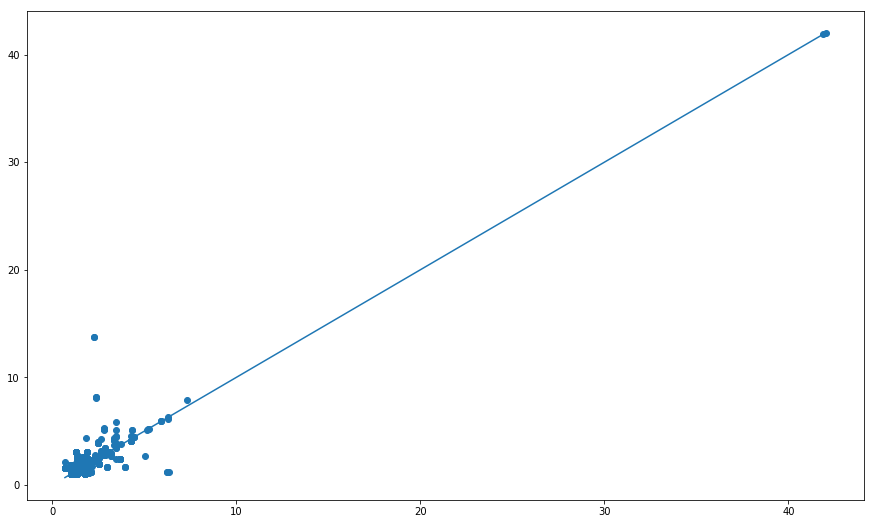

In [33]:
y_pred = regr.predict(x_test)
    
plt.scatter(y_test, y_pred)
minv = min(min(y_test), min(y_pred))
maxv = max(max(y_test), max(y_pred))
plt.plot([minv, maxv], [minv, maxv])

In [53]:
if x.shape[1] != 2:
    pca = PCA(n_components=2)
    x2 = pca.fit_transform(x)
        
groups = list(df.index.get_level_values(0))
labels = [q[-6:] for q in groups]

trace1 = go.Scatter(x=x2[:,0], y=x2[:,1], mode='markers', text=labels, hoverinfo='text',
                        marker = dict(size=8, color=[np.log(q) for q in y], line=dict(width=1, color='rgb(0, 0, 0)')))

layout = go.Layout(showlegend=False, hovermode='closest',
               yaxis=dict(zeroline=False, title='dim2'),
               xaxis=dict(zeroline=False, title='dim1'))

fig = go.Figure(data = [trace1], layout = layout)
iplot(fig, filename="c-v-predict")

TypeError: ufunc 'log' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [294]:
if x.shape[1] != 3:
    pca = PCA(n_components=3)
    x2 = pca.fit_transform(x)
        
trace1 = go.Scatter3d(x=x2[:,0], y=x2[:,1], z=x2[:,2], mode='markers', hoverinfo='none',
                        marker = dict(size=2, color=[np.log(q) for q in y], line=dict(width=1, color='rgb(0, 0, 0)')))

layout = go.Layout(showlegend=False,
               yaxis=dict(zeroline=False, title='dim2', ticks='', showticklabels=False),
               xaxis=dict(zeroline=False, title='dim1', ticks='', showticklabels=False))

fig = go.Figure(data = [trace1], layout = layout)
iplot(fig, filename="c-v-predict")